In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [32]:
columns = ['year', 'month', 'day', 'decimal date', 'molfrac', 'days', '1 yr ago', '10 yrs ago', 'since 1800']
df=pd.read_csv('co2_weekly_mlo.txt',sep="\s+",comment="#",names=columns,na_values=-999.99)

In [33]:
df['date']=pd.to_datetime(df[['year','month','day']])

In [34]:
df.set_index('date',inplace=True)

In [8]:
co2=df['molfrac'].asfreq('W')

Text(0, 0.5, 'co2')

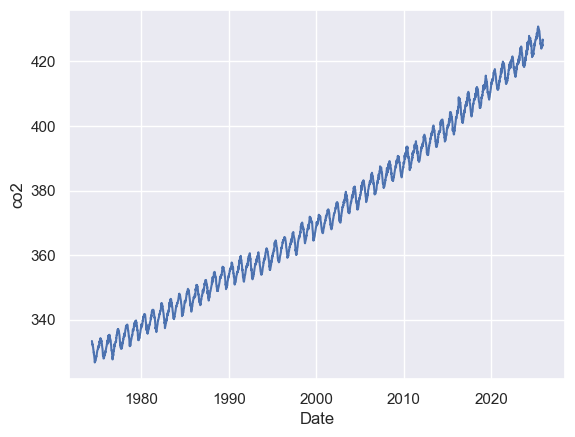

In [35]:
co2=co2.interpolate()

plt.plot(co2)
plt.xlabel('Date')
plt.ylabel('co2')

In [40]:
from statsmodels.tsa.seasonal import STL,MSTL
# to help in ETS Model

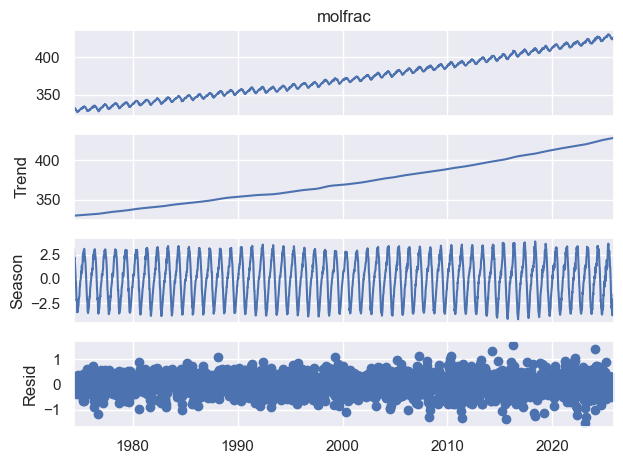

In [47]:
STL(co2).fit().plot()
plt.tight_layout()

from the STL plot we can observe that
- the trend is linear so apply it additively
- seasinality has a constant magnitude so add it additively

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# when using Arima models
# detect stationary or not
# then detect # of AR and MA components to use

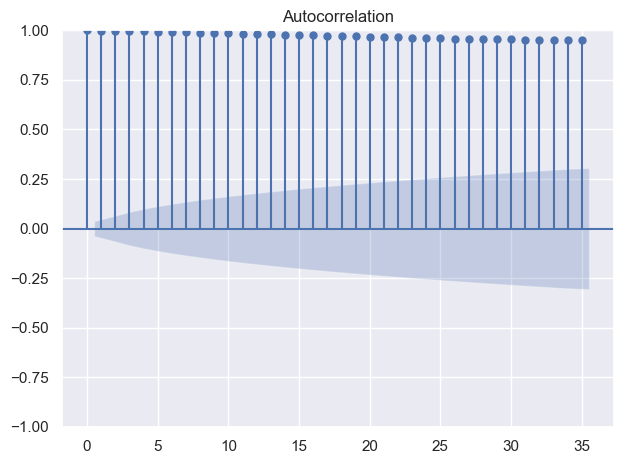

In [52]:
plot_acf(co2.interpolate())
plt.tight_layout()

- Time series seems to be stationary ,we dont need to apply differencing  / or we might conside it has low decay and apply first difference
- we could add 1 `AR` term only
- and to ensure this plot `PACF` 

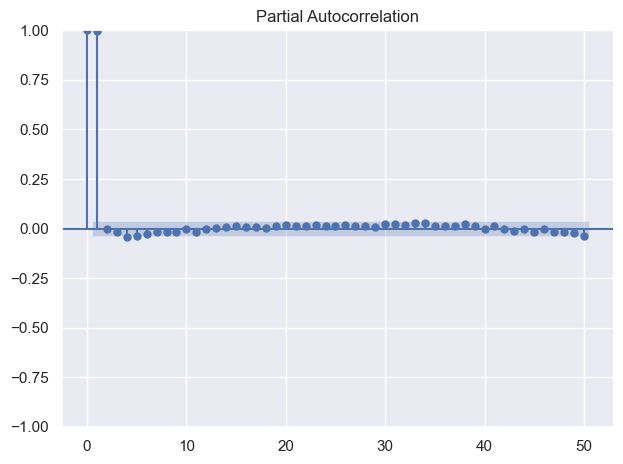

In [74]:
plot_pacf(co2.interpolate(),lags=50)
plt.tight_layout()

In [81]:
# rolling stats
# to know trend direction and variance changes

<Axes: xlabel='date'>

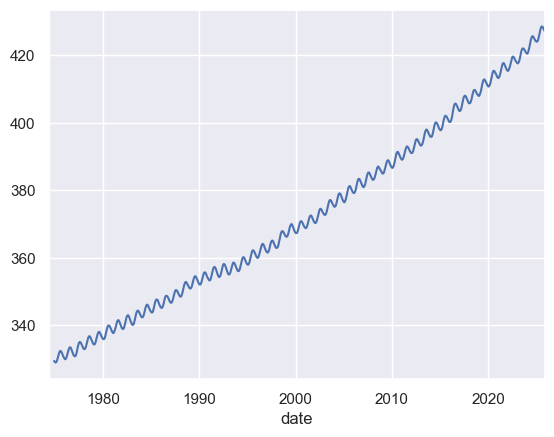

In [84]:
co2.rolling(30).mean().plot()

<Axes: xlabel='date'>

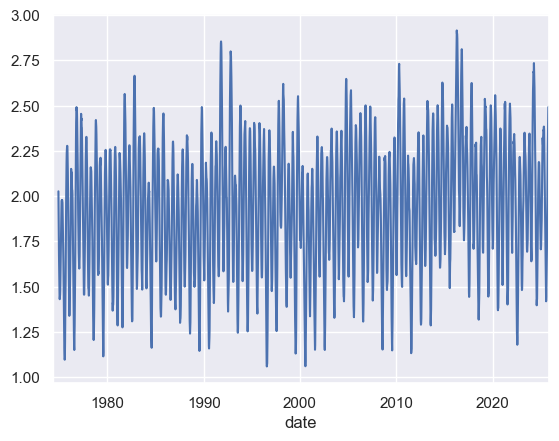

In [85]:
co2.rolling(30).std().plot()

In [102]:
# Stationarity Test (ADF Test)
from statsmodels.tsa.stattools import adfuller

In [103]:
adf_stat, p_val, _, _, crit, _ = adfuller(co2)
adf_text = f"ADF Statistic: {adf_stat:.4f}, p-value: {p_val:.4f}"
adf_text

'ADF Statistic: 0.6810, p-value: 0.9895'

In [105]:
print("Non-stationary" if p_val >0.05 else "Stationary")

Non-stationary


LSTM

LSTM doesn’t provide CI directly; options:

Train multiple models (ensembles) → use quantiles of predictions

Use dropout during inference to get uncertainty (Monte Carlo dropout)

✔ How to use TimeSeriesSplit with

ARIMA Grid Search

RandomizedSearchCV + XGBoost

Keras LSTM tuning (Keras Tuner)

In [ ]:
XGBOOST

You MUST check:

ACF / PACF

Seasonal correlation

Trend

Shifts/volatility

Unit root tests (ADF test)

If you don’t → you're fitting ARIMA to wrong data.